<h4>EDA AND PREPORCESSING</h4>

focus on 2 things:
1) to perform a <i>classification task with TensorFlow</i>
2) how to identify and deal with overfitting through <i>Early Stopping Callback techniques</i> as well as adding in <i>Dropout Layers</i>

<u>EARLY STOPPING</u>
<br>
o automatically stop training based on a loss condition on the validation data that we pass in during the model.fit call.
<br>
<u>DROPOUT LAYERS</u>
<br>
added to turn off neurons during training to prevent overfitting.
Each dropout layer will drop or turn off, a user-defined percentage of neuron units in the previous layer every batch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


in classification task 
<br>
it is better to:
<br>
1)check our required target label in countplot -> to see number of instances per label is a well-balanced problem or not.

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

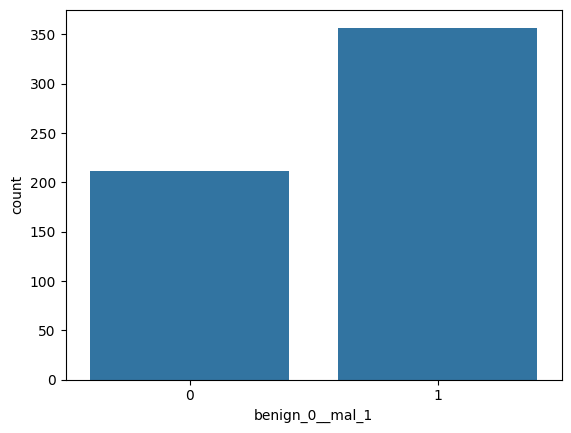

In [6]:
sns.countplot(data=df,x='benign_0__mal_1')

2)check out the correlation between the features themselves.

In [7]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<Axes: >

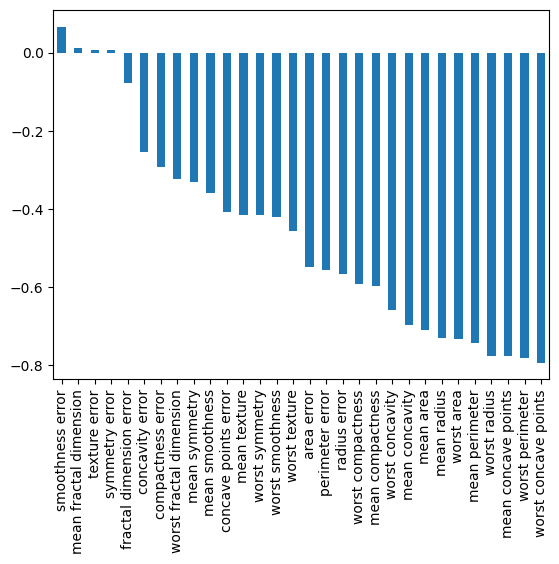

In [8]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False).drop('benign_0__mal_1').plot(kind='bar')

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: ylabel='benign_0__mal_1'>

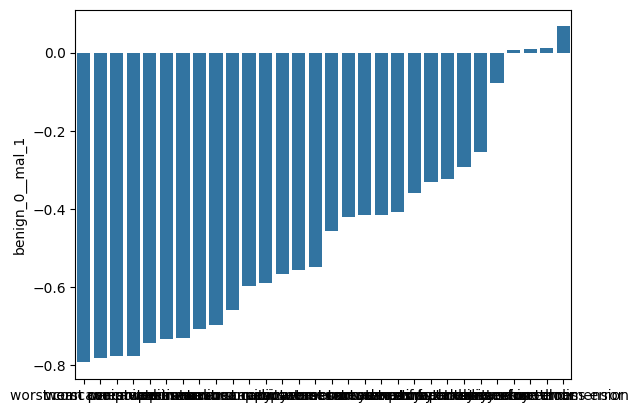

In [10]:
sns.barplot(df.corr()['benign_0__mal_1'][:-1].sort_values())

it looks like we have very correlated values. so we should be able to get pretty strong predictions

<Axes: >

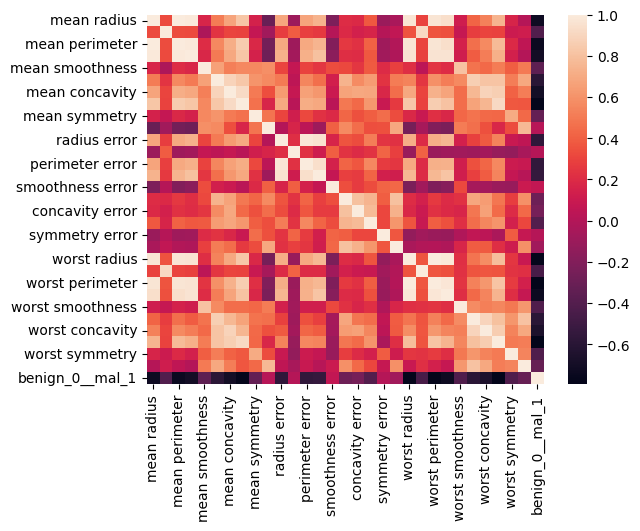

In [11]:
sns.heatmap(df.corr())

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

CREATING MODEL , PREVENT OVERFITTING

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [23]:
X.shape

(569, 30)

In [25]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#for binary classification [last activation function should be sigmoid for binary classification]
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [26]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.6979 - val_loss: 0.6736
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6596 - val_loss: 0.6357
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6278 - val_loss: 0.5928
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5837 - val_loss: 0.5486
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5420 - val_loss: 0.4987
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5035 - val_loss: 0.4488
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4360 - val_loss: 0.3971
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3947 - val_loss: 0.3505
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3448 - val_loss: 0.3102
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3016 - val_loss: 0.2831
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2879 - val_loss: 0.2527
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [30]:
losses=pd.DataFrame(model.history.history)

<Axes: >

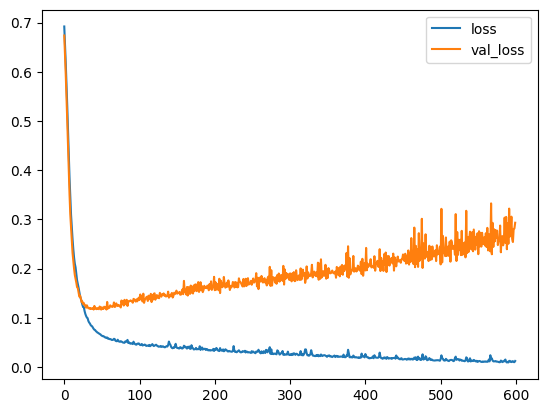

In [32]:
losses.plot()

<b>OVERFITTING</b>
during the first couple of epochs both validation and training loss are both decreasing.
<br>
However, at a certain point in time,
our training loss is still going down but our validation loss is beginning to increase
<br>
<u>
tells us, that we're overfitting to our training datase
</u>

In [33]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

<h5>USING EARLY STOPPING</h5>

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |      monitor: Quantity to be monitored. Defaults 

In [36]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)


<u><b>MODE</b></u><br>
<u>if our metric was accuracy,accuracy is something you want to maximize.</u><br>
<u>if our metric is loss,loss is something you want to minimize.</u>
<br>
<u><b>PATIENCE</b></u><br>
<u>if patience=25. [That means we'll wait 25 epochs even after we've kind of detected a stopping point because of noise that could occur. ]</u

In [37]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])
"""
what's going to happen is it's going to attempt to run on 600 epochs unless the early stop is triggered.
And in this case, note that the early stop willbe triggered
"""

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7113 - val_loss: 0.6898
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6759 - val_loss: 0.6530
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6363 - val_loss: 0.6138
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5910 - val_loss: 0.5680
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5504 - val_loss: 0.5159
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4960 - val_loss: 0.4566
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4275 - val_loss: 0.3956
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3739 - val_loss: 0.3455
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3446 - val_loss: 0.3020
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3094 - val_loss: 0.2681
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2537 - val_loss: 0.2414
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

"\nwhat's going to happen is it's going to attempt to run on 600 epochs unless the early stop is triggered.\nAnd in this case, note that the early stop willbe triggered\n"

In [38]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

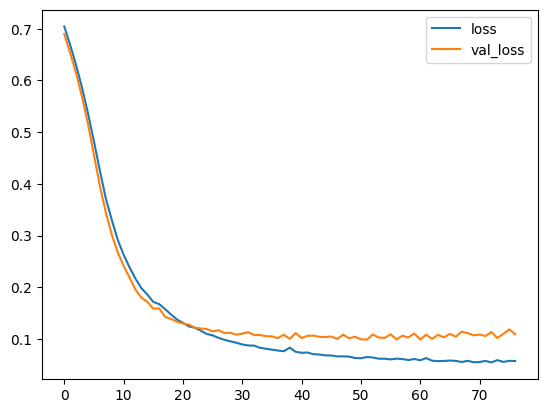

In [39]:
model_loss.plot()

And this is exactly the kind of plot that we want to see where lose and validation loss are both beginning to go down and right as they begin to spread out,that's probably a good indication of where we should stop training.

<h5>USING DROPOUT LAYERS</h5>

In [40]:
from tensorflow.keras.layers import Dropout

In [47]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
#since binary activation=sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

<u><b>Dropout attribute</b><u><br>
rate= is the probability that you're going to randomly turn off the actual neurons.
<br>
eg:if you put 0:<br>
that means you are taking 0% of the neurons and randomly turning them off during training.<br>
eg:if you put 1:<br>
that means you are taking 100% of the neurons and randomly turning them off during training.

In [48]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7243 - val_loss: 0.6666
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6608 - val_loss: 0.6382
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6420 - val_loss: 0.6097
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6245 - val_loss: 0.5784
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6026 - val_loss: 0.5452
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5705 - val_loss: 0.5077
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5281 - val_loss: 0.4725
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5059 - val_loss: 0.4381
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5029 - val_loss: 0.4111
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4564 - val_loss: 0.3813
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4500 - val_loss: 0.3569
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4224 - val_l

In [49]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

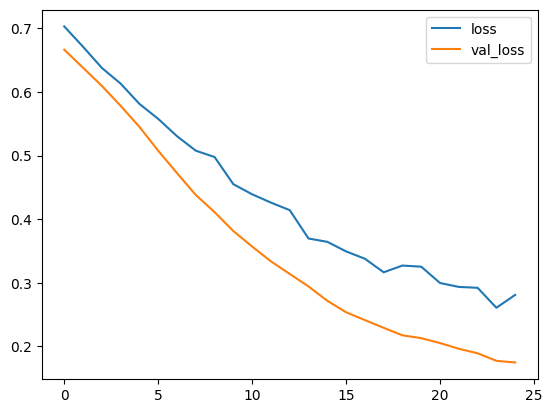

In [50]:
model_loss.plot()

EVALUATION OF OUR CLASSES

In [52]:
#predictions = model.predict_classes(X_test)
"""
this was supposed to be the code but predict_classes have been removed
"""

'\nthis was supposed to be the code but predict_classes have been removed\n'

In [51]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[52  3]
 [ 3 85]]


<h5>SUMMARY</h5>
<b>WE CAN ADD DROPOUT LAYERS AND EARLY STOPPING </b> to not have to worry about the number of epochs that we're training for

TRAINING DATA ONCE MORE TO SEE IF IT IMPROVES PREDICTING

In [71]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0982 - val_loss: 0.1083
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0776 - val_loss: 0.1057
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1081 - val_loss: 0.0986
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0952 - val_loss: 0.1131
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1054 - val_loss: 0.1251
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0673 - val_loss: 0.1077
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0899 - val_loss: 0.1223
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0570 - val_loss: 0.1141
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0610 - val_loss: 0.1103
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0748 - val_loss: 0.1160
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0724 - val_loss: 0.1092
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

In [72]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

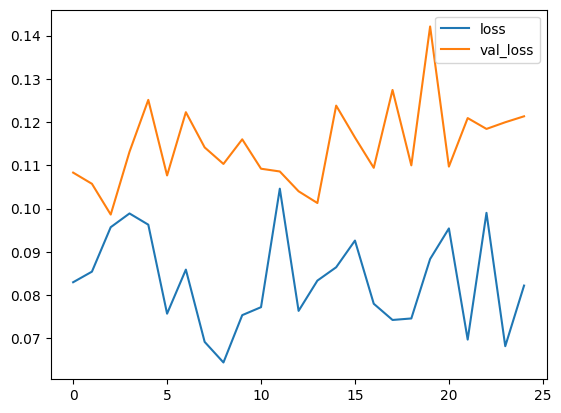

In [73]:
model_loss.plot()

In [74]:
sample_predictions = (model.predict(X_test) > 0.5)*1
print(classification_report(y_test,sample_predictions))
print(confusion_matrix(y_test,sample_predictions))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 4 84]]
